<a href="https://colab.research.google.com/github/ShehabMohamed21/Face-Recognition/blob/main/Face_Recognition_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Download the Dataset and Understand the Format**

imports

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from skimage import data
from skimage import io
from skimage.viewer import ImageViewer
import os
import re
from PIL import Image
import matplotlib.pyplot as plt
import gc
import random


# Scoring
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Viewer requires Qt
  


read from file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


connect with google drive and read images

In [ ]:
directory = "/content/drive/MyDrive/Face Recognition Dataset/archive/"
imagesList = []
facesLabelVector = []
data = []
for subdir, dirs, files in sorted(os.walk(directory)):
    for file in sorted(files):
      tmp = subdir[-3:]
      temp = re.findall(r'\d+', tmp)
      res = list(map(int, temp))
      facesLabelVector.append(res[0])
      imagesList.append(io.imread(os.path.join(subdir, file)))

# **Generate the Data Matrix and the Label vector**

data matrix

In [ ]:
imagesList = np.array(imagesList)
print(imagesList)
D = []
for i in range(0, 400):
  D.append(imagesList[i].flatten()) 


np.array(D).shape
z = np.array(D)
print(z)

[[[ 48  49  45 ...  56  56  54]
  [ 45  52  39 ...  52  50  51]
  [ 45  50  42 ...  48  53  50]
  ...
  [ 50  48  50 ...  45  46  46]
  [ 45  54  49 ...  46  47  47]
  [ 51  51  51 ...  47  46  46]]

 [[ 34  34  33 ...   1   1   1]
  [ 35  30  32 ...  38  47  39]
  [ 34  28  31 ...  55  59  49]
  ...
  [ 30  29  31 ...  35  37  41]
  [ 31  29  32 ...  42  34  39]
  [ 28  33  27 ...  37  40  33]]

 [[ 60  60  62 ...  40  53  46]
  [ 58  73  54 ...  34  50  51]
  [ 68  77  80 ...  36  50  49]
  ...
  [ 24 143 160 ...  34  33  33]
  [ 18 136 161 ...  36  36  31]
  [  9 111 168 ...  32  34  34]]

 ...

 [[112 109 116 ... 110 112 110]
  [112 112 113 ... 114 110 113]
  [111 111 113 ... 113 110 110]
  ...
  [139 141 136 ...  93  87  93]
  [138 137 139 ...  94  90  94]
  [136 136 139 ...  93  88  92]]

 [[111 114 112 ... 112 108 110]
  [112 113 111 ... 112 111 111]
  [113 109 112 ... 109 111 108]
  ...
  [141 135 133 ...  84  84  84]
  [137 135 136 ...  89  90  88]
  [138 135 138 ...  88  86  

label vector

In [ ]:
print(facesLabelVector)

# **Split the Dataset into Training and Test sets**

In [ ]:
X_train = []
X_test = []
Y_train = []
Y_test = []


for i in range (0 , 400):
    if(i % 2 == 0):
      X_test.append(D[i])
      Y_test.append(facesLabelVector[i])
    else:
      X_train.append(D[i])
      Y_train.append(facesLabelVector[i])
print(np.array(X_train).shape)
print(np.array(X_test).shape)

(200, 10304)
(200, 10304)


## **Classification using PCA**

In [ ]:
X_train2=np.array(X_train)
X_test2=np.array(X_test)

In [ ]:
alpha = np.array([0.8,0.85,0.9,0.95])

def pca_values_vectors(X_trai):
  row,t=X_trai.shape
  mean = np.mean(X_trai,axis=0)
  one = np.ones((row,1))
  z=X_trai-one*mean
  cov = (1/row)*(np.dot(np.transpose(z),z))
  values,vectors=np.linalg.eigh(cov)
  values=np.real(values)
  return values,vectors
   

In [ ]:
def pca_accuracies_bestTrainTest(value,vector,X_trai,X_tes,Y_trai,Y_tes):
  accuracies=np.array([])
  initialAccuracy = 0
  sum=np.sum(value)
  for i in alpha:
    size=value.size-1
    xR,col=vector.shape
    col = col-1
    r=0
    chosenValues = np.array([])
    P = np.empty((xR,0),int)
    while r<i:
      chosenValues = np.append(chosenValues,np.take(value,[size]))
      P=np.append(P,np.array([vector[:,col]]).transpose(),axis=1)
      col = col-1
      size=size-1
      rSum = np.sum(chosenValues)
      r = (rSum)/(sum)

    ProjectedTrain=np.transpose(np.dot(np.transpose(P),np.transpose(X_trai)))
    ProjectedTest=np.transpose(np.dot(np.transpose(P),np.transpose(X_tes)))

    knn = KNeighborsClassifier(n_neighbors = 1)
    knn.fit(ProjectedTrain,Y_trai)
    Y_pred = knn.predict(ProjectedTest)
    accuracy = accuracy_score(Y_tes,Y_pred)*100
    print("Accuracy for alpha ",i," is : ",accuracy)
    accuracies=np.append(accuracies,accuracy)
    if initialAccuracy < accuracy:
      initialAccuracy = accuracy
      bestTrain = ProjectedTrain
      bestTest = ProjectedTest
      bestYpred = Y_pred
      bestAcc = accuracy

  return accuracies,bestTrain,bestTest,bestAcc,bestYpred

In [ ]:
def PCA(x,y,x1,y1):
  values,vectors = pca_values_vectors(x)
  accuracies,bestTrain,bestTest,bestAcc,bestYpred = pca_accuracies_bestTrainTest(values,vectors,x,y,x1,y1)
  return accuracies,bestTrain,bestTest,bestAcc,bestYpred

Accuracy for alpha  0.8  is :  94.0
Accuracy for alpha  0.85  is :  94.5
Accuracy for alpha  0.9  is :  94.0
Accuracy for alpha  0.95  is :  93.5


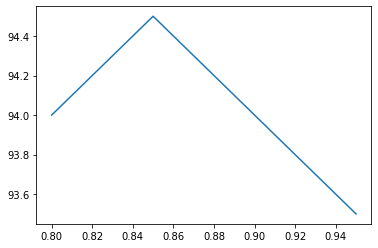

In [ ]:
accuracies,bestTrain,bestTest,bestAcc,bestYpred = PCA(X_train2,X_test2,Y_train,Y_test)
a = [0.8, 0.85, 0.9, 0.95]
plt.plot(a, accuracies)
plt.show()

# **Classification Using LDA**

###NEW approach

In [ ]:
n = 40
nk = [5] * n
c = 10304

In [ ]:
def eig_val_vec_LDA(X_train, n, nk, c):
  means = []
  counter = 0

  for i in range(n):
    Di = X_train[counter : counter + nk[i]][:]
    counter = counter + nk[i]
    mean_i = np.mean(Di, axis = 0)
    means.append(mean_i.reshape(c,1))
  
  mean = (np.mean(X_train, axis = 0)).reshape(c,1)

  Sb = np.zeros((c,c))
  for i in range(n):
    subtract = np.subtract(means[i], mean)
    temp = np.dot(np.dot(nk[i] ,subtract), np.transpose(subtract))
    Sb = np.add(Sb, temp)

  gc.collect()

  S = np.zeros((c,c))
  
  counter = 0

  for i in range(n):
    Di = X_train[counter : counter + nk[i]][:]
    counter = counter + nk[i]
    Zi = np.subtract(Di, np.transpose(means[i]))
    si = np.dot(np.transpose(Zi), Zi)
    S = np.add(S,si)
  
  gc.collect()

  S_inverse = np.linalg.inv(S)

  eigenvalues, eigenvectors = np.linalg.eigh(np.dot(S_inverse, Sb))

  gc.collect()

  return eigenvalues, eigenvectors


In [ ]:
def get_projected_data_LDA(start_index, eigenvectors, X_train, X_test):
  projection_mat = np.transpose(eigenvectors[:, start_index: ])

  new_train = np.dot(X_train, np.transpose(projection_mat))
  new_test = np.dot(X_test, np.transpose(projection_mat))

  return new_train, new_test

In [ ]:
def get_accuracy_LDA(new_train, new_test, Y_train, Y_test):
  knn = KNeighborsClassifier(n_neighbors = 1)
  knn.fit(new_train,Y_train)
  y_pred = knn.predict(new_test)
  accuracy = accuracy_score(Y_test,y_pred)*100

  return accuracy, y_pred
  

In [ ]:
eigenvalues, eigenvectors = eig_val_vec_LDA(X_train, n, nk, c)

In [ ]:
new_train, new_test = get_projected_data_LDA(c-n , eigenvectors, X_train, X_test)
accuracy, y_pred = get_accuracy_LDA(new_train, new_test, Y_train, Y_test)

In [ ]:
accuracy

# **Classifier Tuning**

In [ ]:
K = [1, 3, 5, 7]

In [ ]:
# PCA
pcaAccuracies = np.array([])
for i in K:
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(bestTrain,Y_train)
  Y_pred = knn.predict(bestTest)
  accuracy = accuracy_score(Y_test,Y_pred)*100
  pcaAccuracies = np.append(pcaAccuracies,accuracy)
  print(accuracy)

94.5
84.5
79.5
78.5


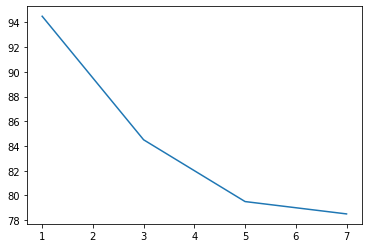

In [ ]:
plt.plot(K, pcaAccuracies)
plt.show()

In [ ]:
# LDA
ldaAccuracies =np.array([])
for i in K:
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(new_train,Y_train)
  y_pred = knn.predict(new_test)
  accuracy = accuracy_score(Y_test,y_pred)*100
  ldaAccuracies = np.append(ldaAccuracies,accuracy)
  print(accuracy)

95.5
87.5
85.0
81.5


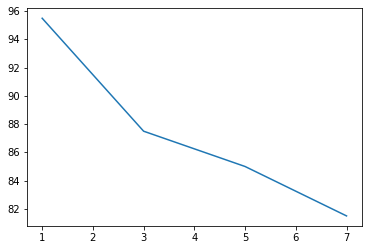

In [ ]:
plt.plot(K, ldaAccuracies)
plt.show()

# **Compare vs Non-Face Images**

In [ ]:
directory = "/content/drive/MyDrive/Face Recognition Dataset/non-face/"
non_facesImagesList = []
data_train = []
data_test = []
for subdir, dirs, files in sorted(os.walk(directory)):
    #print(subdir)
    for file in sorted(files):
      #print(file)
      img = Image.open(os.path.join(directory , file)).convert('L') 
      img= img.resize((92, 112))
       # get a 1D array of pixels
      image_vector=np.asarray(img).ravel()
      non_facesImagesList.append(image_vector)


In [ ]:
random.seed(7)
random.shuffle(non_facesImagesList)

In [ ]:
# printing images
def print_images(data_images, index):
    my_img = data_images[index]
    my_img=np.reshape(my_img,(112,92))
    plt.imshow(my_img, cmap='gray')
   
    plt.show()
    
    plt.close()

In [ ]:
non_facesImagesList

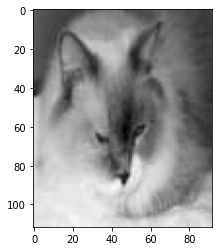

In [ ]:
print_images(non_facesImagesList, 125)

### prepare data set

In [ ]:
labelVector1 = np.full(400,1)
labelVector2 = np.full(400,0)

In [ ]:
X_total_train = []
X_total_test = []
Y_total = []

for i in range(1,5):
  X_total_train.append(np.concatenate((np.array(X_train), np.array(non_facesImagesList[:i * 50][:]))))
  X_total_test.append(np.concatenate((np.array(X_test), np.array(non_facesImagesList[i * 50: (i + i) * 50][:]))))
  Y_total.append(np.concatenate((labelVector1[:200], labelVector2[: i * 50])))


### LDA

In [ ]:
n = 2
nk = [[200, 50], [200, 100], [200, 150], [200, 200]]
c = 10304

get eigen vectors of 100, 200, 300, 400 Non-Faces

In [ ]:
eigenvalues1, eigenvectors1 = eig_val_vec_LDA(X_total_train[0], n, nk[0], c)

In [ ]:
eigenvalues2, eigenvectors2 = eig_val_vec_LDA(X_total_train[1], n, nk[1], c)

In [ ]:
eigenvalues3, eigenvectors3 = eig_val_vec_LDA(X_total_train[2], n, nk[2], c)

In [ ]:
eigenvalues4, eigenvectors4 = eig_val_vec_LDA(X_total_train[3], n, nk[3], c)

In [ ]:
eigenvectors = [eigenvectors1, eigenvectors2, eigenvectors3, eigenvectors4]

In [ ]:
# to tune number of eigen vectors
def calc_eigenvectors(X_total_train, X_total_test, Y_total, eigenvector):
  num_of_vec = []
  accuracy_mat = []
  best_index = 0
  best_accuracy = 0
  Y_pred = []

  for i in range (1,50):
    new_train, new_test = get_projected_data_LDA(c-i , eigenvector, X_total_train, X_total_test)
    accuracy, y_pred = get_accuracy_LDA(new_train, new_test, Y_total, Y_total)
    num_of_vec.append(i)
    accuracy_mat.append(accuracy)
    if(accuracy > best_accuracy):
      best_accuracy = accuracy
      best_index = i
      Y_pred = y_pred

  return num_of_vec, accuracy_mat, best_index, best_accuracy, Y_pred

### Plot After Tuning (seed = 4)

plot after tuning with loop

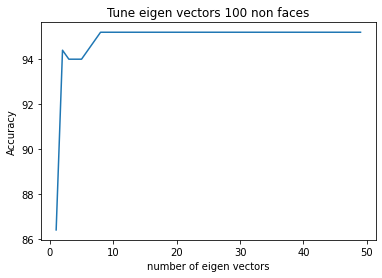

8
95.19999999999999


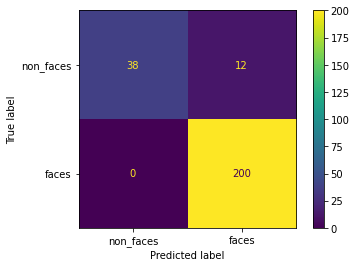

In [ ]:
i = 0
num_of_vec, accuracy1, best_index, best_accuracy, Y_pred = calc_eigenvectors(X_total_train[i], X_total_test[i], Y_total[i], eigenvectors1)

plt.plot(num_of_vec, accuracy1)
plt.xlabel('number of eigen vectors')
plt.ylabel('Accuracy')
plt.title('Tune eigen vectors 100 non faces')
plt.show()


print(best_index)
print(best_accuracy)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix( Y_total[i],Y_pred,labels=[0,1]),
                              display_labels=["non_faces","faces"])
disp = disp.plot()

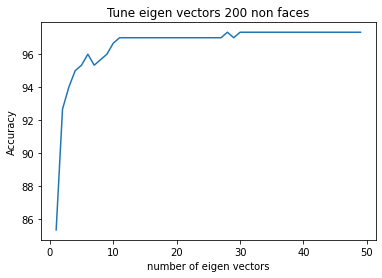

28
97.33333333333334


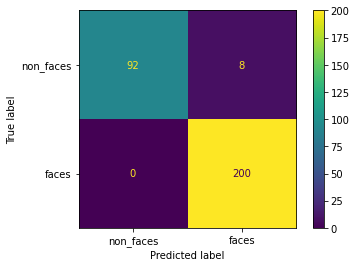

In [ ]:
i = 1
num_of_vec, accuracy2, best_index, best_accuracy, Y_pred = calc_eigenvectors(X_total_train[i], X_total_test[i], Y_total[i], eigenvectors2)

plt.plot(num_of_vec, accuracy2)
plt.xlabel('number of eigen vectors')
plt.ylabel('Accuracy')
plt.title('Tune eigen vectors 200 non faces')
plt.show()

print(best_index)
print(best_accuracy)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix( Y_total[i],Y_pred,labels=[0,1]),
                              display_labels=["non_faces","faces"])
disp = disp.plot()

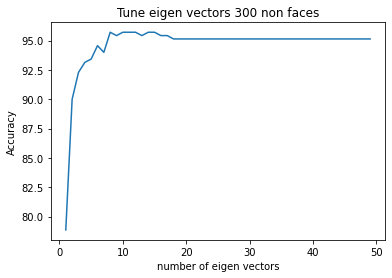

8
95.71428571428572


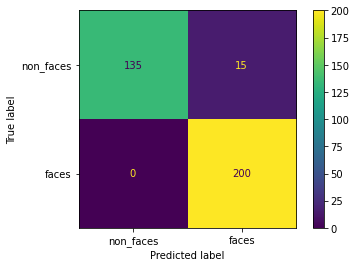

In [ ]:
i = 2
num_of_vec, accuracy3, best_index, best_accuracy, Y_pred = calc_eigenvectors(X_total_train[i], X_total_test[i], Y_total[i], eigenvectors3)

plt.plot(num_of_vec, accuracy3)
plt.xlabel('number of eigen vectors')
plt.ylabel('Accuracy')
plt.title('Tune eigen vectors 300 non faces')
plt.show()

print(best_index)
print(best_accuracy)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix( Y_total[i],Y_pred,labels=[0,1]),
                              display_labels=["non_faces","faces"])
disp = disp.plot()

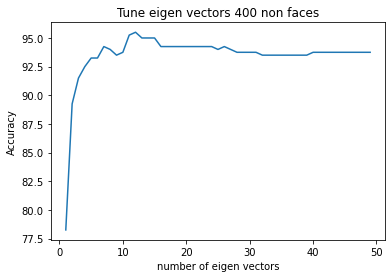

12
95.5


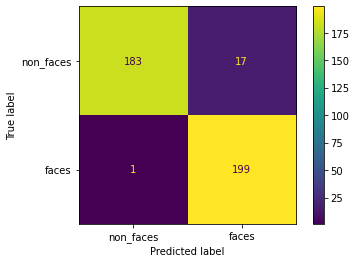

In [ ]:
i = 3
num_of_vec, accuracy4, best_index, best_accuracy, Y_pred = calc_eigenvectors(X_total_train[i], X_total_test[i], Y_total[i], eigenvectors4)

plt.plot(num_of_vec, accuracy4)
plt.xlabel('number of eigen vectors')
plt.ylabel('Accuracy')
plt.title('Tune eigen vectors 400 non faces')
plt.show()

print(best_index)
print(best_accuracy)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix( Y_total[i],Y_pred,labels=[0,1]),
                              display_labels=["non_faces","faces"])
disp = disp.plot()

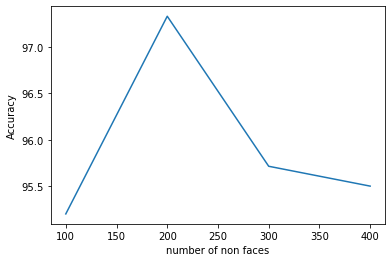

In [ ]:
non_faces_size = [100, 200, 300, 400]
accuracy = [accuracy1[7], accuracy2[27], accuracy3[7], accuracy4[11]]
plt.xlabel('number of non faces')
plt.ylabel('Accuracy')

plt.plot(non_faces_size, accuracy)
plt.show()

### Plot After Tuning (seed = 7)

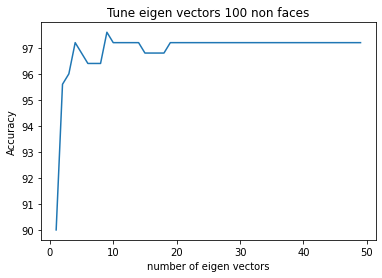

9
97.6


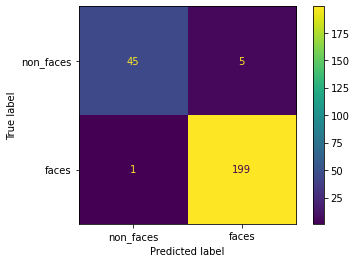

In [ ]:
i = 0
num_of_vec, accuracy1, best_index, best_accuracy, Y_pred = calc_eigenvectors(X_total_train[i], X_total_test[i], Y_total[i], eigenvectors1)

plt.plot(num_of_vec, accuracy1)
plt.xlabel('number of eigen vectors')
plt.ylabel('Accuracy')
plt.title('Tune eigen vectors 100 non faces')
plt.show()


print(best_index)
print(best_accuracy)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix( Y_total[i],Y_pred,labels=[0,1]),
                              display_labels=["non_faces","faces"])
disp = disp.plot()

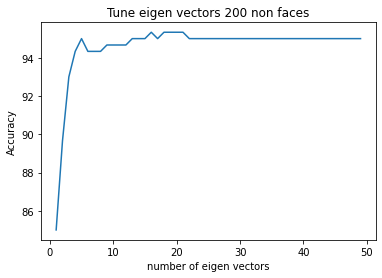

16
95.33333333333334


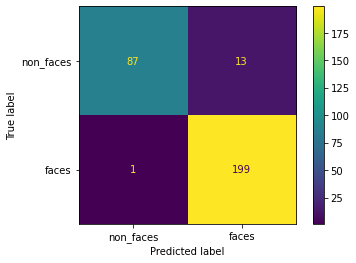

In [ ]:
i = 1
num_of_vec, accuracy2, best_index, best_accuracy, Y_pred = calc_eigenvectors(X_total_train[i], X_total_test[i], Y_total[i], eigenvectors2)

plt.plot(num_of_vec, accuracy2)
plt.xlabel('number of eigen vectors')
plt.ylabel('Accuracy')
plt.title('Tune eigen vectors 200 non faces')
plt.show()

print(best_index)
print(best_accuracy)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix( Y_total[i],Y_pred,labels=[0,1]),
                              display_labels=["non_faces","faces"])
disp = disp.plot()

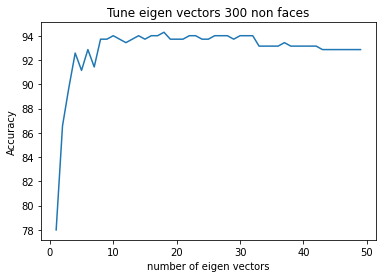

18
94.28571428571428


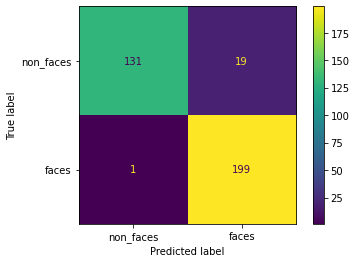

In [ ]:
i = 2
num_of_vec, accuracy3, best_index, best_accuracy, Y_pred = calc_eigenvectors(X_total_train[i], X_total_test[i], Y_total[i], eigenvectors3)

plt.plot(num_of_vec, accuracy3)
plt.xlabel('number of eigen vectors')
plt.ylabel('Accuracy')
plt.title('Tune eigen vectors 300 non faces')
plt.show()

print(best_index)
print(best_accuracy)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix( Y_total[i],Y_pred,labels=[0,1]),
                              display_labels=["non_faces","faces"])
disp = disp.plot()

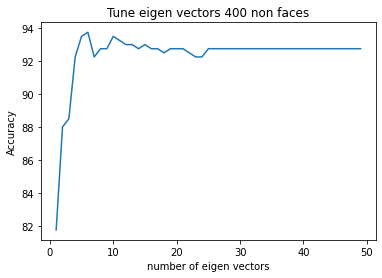

6
93.75


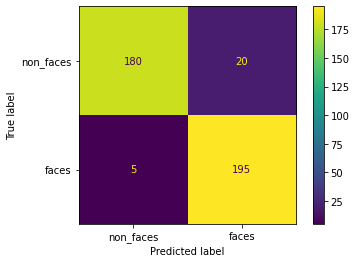

In [ ]:
i = 3
num_of_vec, accuracy4, best_index, best_accuracy, Y_pred = calc_eigenvectors(X_total_train[i], X_total_test[i], Y_total[i], eigenvectors4)

plt.plot(num_of_vec, accuracy4)
plt.xlabel('number of eigen vectors')
plt.ylabel('Accuracy')
plt.title('Tune eigen vectors 400 non faces')
plt.show()

print(best_index)
print(best_accuracy)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix( Y_total[i],Y_pred,labels=[0,1]),
                              display_labels=["non_faces","faces"])
disp = disp.plot()

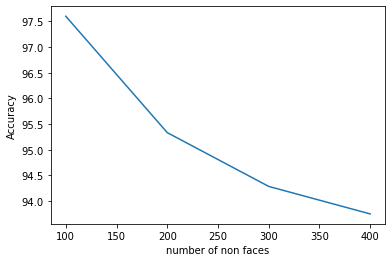

In [ ]:
non_faces_size = [100, 200, 300, 400]
accuracy = [accuracy1[8], accuracy2[15], accuracy3[17], accuracy4[5]]
plt.xlabel('number of non faces')
plt.ylabel('Accuracy')

plt.plot(non_faces_size, accuracy)
plt.show()

### LDA with 1 eigen vector

#### seed = 4

86.4
85.33333333333334
78.85714285714286
78.25


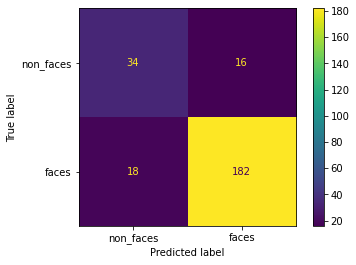

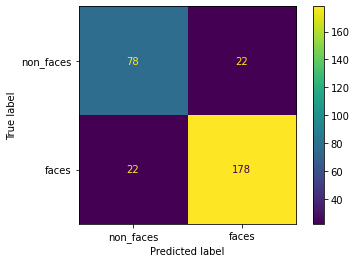

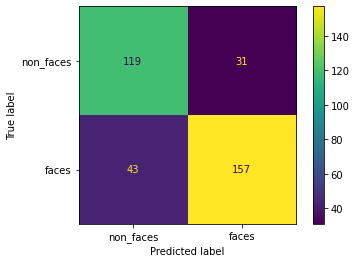

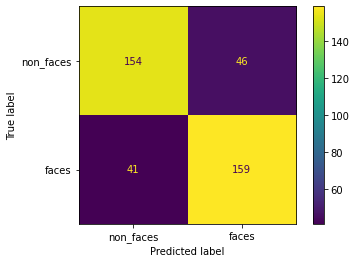

In [ ]:
accueacy_list_eig_vec_one = []
for i in range(4):
  new_train_eig_vec_one, new_test_eig_vec_one = get_projected_data_LDA(c-1 , eigenvectors[i], X_total_train[i], X_total_test[i])
  accuracy_eig_vec_one, y_pred_eig_vec_one = get_accuracy_LDA(new_train_eig_vec_one, new_test_eig_vec_one, Y_total[i], Y_total[i])

  accueacy_list_eig_vec_one.append(accuracy_eig_vec_one)

  print(accuracy_eig_vec_one)

  disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix( Y_total[i],y_pred_eig_vec_one,labels=[0,1]),
                                display_labels=["non_faces","faces"])
  disp = disp.plot()

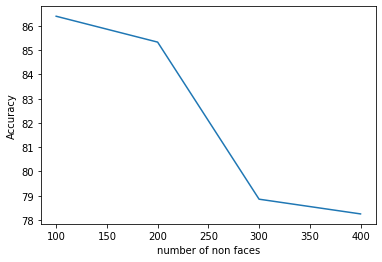

In [ ]:
non_faces_size = [100, 200, 300, 400]

plt.xlabel('number of non faces')
plt.ylabel('Accuracy')

plt.plot(non_faces_size, accueacy_list_eig_vec_one)
plt.show()

#### seed = 7

90.0
85.0
78.0
81.75


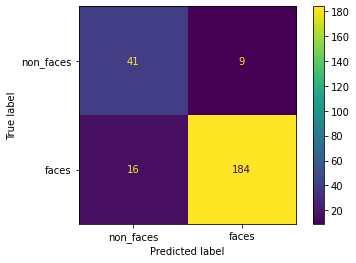

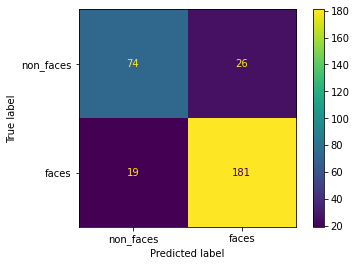

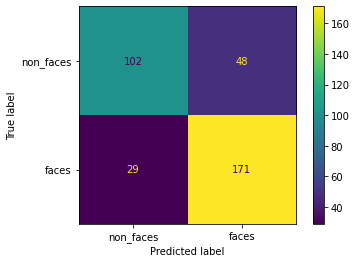

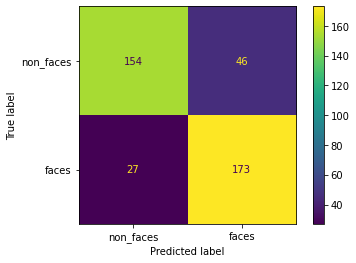

In [ ]:
accueacy_list_eig_vec_one = []
for i in range(4):
  new_train_eig_vec_one, new_test_eig_vec_one = get_projected_data_LDA(c-1 , eigenvectors[i], X_total_train[i], X_total_test[i])
  accuracy_eig_vec_one, y_pred_eig_vec_one = get_accuracy_LDA(new_train_eig_vec_one, new_test_eig_vec_one, Y_total[i], Y_total[i])

  accueacy_list_eig_vec_one.append(accuracy_eig_vec_one)

  print(accuracy_eig_vec_one)

  disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix( Y_total[i],y_pred_eig_vec_one,labels=[0,1]),
                                display_labels=["non_faces","faces"])
  disp = disp.plot()

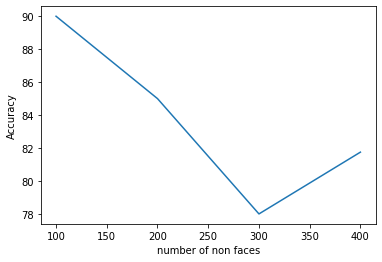

In [ ]:
non_faces_size = [100, 200, 300, 400]

plt.xlabel('number of non faces')
plt.ylabel('Accuracy')

plt.plot(non_faces_size, accueacy_list_eig_vec_one)
plt.show()

PCA NONFACES

Accuracy for alpha  0.8  is :  94.8
Accuracy for alpha  0.85  is :  94.8
Accuracy for alpha  0.9  is :  94.0
Accuracy for alpha  0.95  is :  93.60000000000001


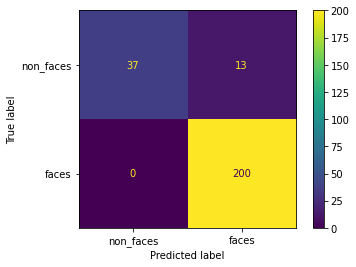

In [ ]:
acc,bestTrain,bestTest,bestAc,bestYpre = PCA(X_total_train[0],X_total_test[0],Y_total[0],Y_total[0])
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix( Y_total[0],bestYpre,labels=[0,1]),
                              display_labels=["non_faces","faces"])
disp = disp.plot()


Accuracy for alpha  0.8  is :  93.33333333333333
Accuracy for alpha  0.85  is :  92.66666666666666
Accuracy for alpha  0.9  is :  93.0
Accuracy for alpha  0.95  is :  90.66666666666666


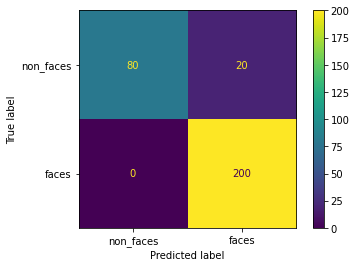

In [ ]:
acc1,bestTrain1,bestTest1,bestAc1,bestYpre1 = PCA(X_total_train[1],X_total_test[1],Y_total[1],Y_total[1])
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix( Y_total[1],bestYpre1,labels=[0,1]),
                              display_labels=["non_faces","faces"])
disp = disp.plot()

Accuracy for alpha  0.8  is :  93.42857142857143
Accuracy for alpha  0.85  is :  92.28571428571428
Accuracy for alpha  0.9  is :  92.57142857142857
Accuracy for alpha  0.95  is :  90.85714285714286


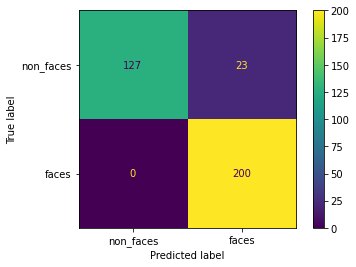

In [ ]:
acc2,bestTrain2,bestTest2,bestAc2,bestYpre2 = PCA(X_total_train[2],X_total_test[2],Y_total[2],Y_total[2])
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_total[2],bestYpre2, labels=[0,1]),
                              display_labels=["non_faces","faces"])
disp = disp.plot()

Accuracy for alpha  0.8  is :  93.0
Accuracy for alpha  0.85  is :  92.25
Accuracy for alpha  0.9  is :  91.25
Accuracy for alpha  0.95  is :  90.25


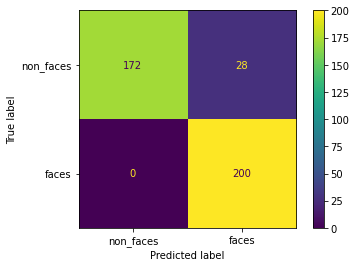

In [ ]:
acc3,bestTrain3,bestTest3,bestAc3,bestYpre3 = PCA(X_total_train[3],X_total_test[3],Y_total[3],Y_total[3])
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_total[3],bestYpre3,labels=[0,1]),
                              display_labels=["non_faces","faces"])
disp = disp.plot()

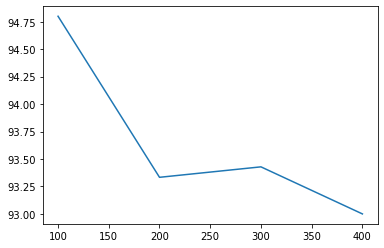

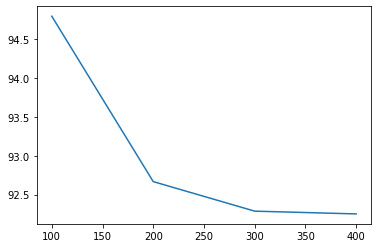

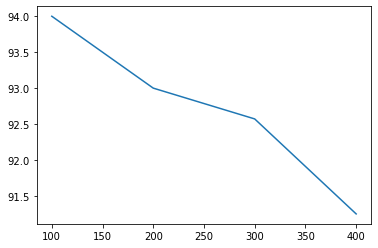

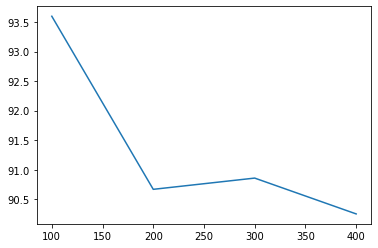

In [ ]:
non_faces_size = [100, 200, 300, 400]
#0.8
plt_acc = [acc[0], acc1[0], acc2[0], acc3[0]]
#0.85
plt_acc1 = [acc[1], acc1[1], acc2[1], acc3[1]]
#0.9
plt_acc2 = [acc[2], acc1[2], acc2[2], acc3[2]]
#0.95
plt_acc3 = [acc[3], acc1[3], acc2[3], acc3[3]]

#0.8
plt.plot(non_faces_size, plt_acc)
plt.show()
#0.85
plt.plot(non_faces_size, plt_acc1)
plt.show()
#0.9
plt.plot(non_faces_size, plt_acc2)
plt.show()
#0.95
plt.plot(non_faces_size, plt_acc3)
plt.show()

# Bonus

In [ ]:
print(np.array(D).shape)

(400, 10304)


In [ ]:
X_train_bonus = []
X_test_bonus = []
Y_train_bonus = []
Y_test_bonus = []
testingCounter = 0

for i in range (0 , 400):
    if(testingCounter < 7):
        X_train_bonus.append(D[i])
        Y_train_bonus.append(facesLabelVector[i])
        testingCounter+=1
    elif(testingCounter < 10):
        X_test_bonus.append(D[i])
        Y_test_bonus.append(facesLabelVector[i])
        testingCounter+=1
    else:
        testingCounter = 0
        X_train_bonus.append(D[i])
        Y_train_bonus.append(facesLabelVector[i])
        testingCounter+=1
        

In [ ]:
X_train_bonus = np.array(X_train_bonus)
X_test_bonus = np.array(X_test_bonus)
Y_train_bonus = np.array(Y_train_bonus)
Y_test_bonus = np.array(Y_test_bonus)

print(X_train_bonus.shape)
print(X_test_bonus.shape)

(280, 10304)
(120, 10304)


LDA

In [ ]:
n = 40
nk = [7] * n
c = 10304

In [ ]:
eigenvalues, eigenvectors = eig_val_vec_LDA(X_train_bonus, n, nk, c)

In [ ]:
new_train, new_test = get_projected_data_LDA(c-n , eigenvectors, X_train_bonus, X_test_bonus)
accuracy, ypred = get_accuracy_LDA(new_train, new_test, Y_train_bonus, Y_test_bonus)

In [ ]:
accuracy

96.66666666666667

PCA 

In [ ]:
acc,bestTrain,bestTest,bestAc,bestYpre = PCA(X_train_bonus,X_test_bonus,Y_train_bonus,Y_test_bonus)
print('-----------------------------------------')

Accuracy for alpha  0.8  is :  96.66666666666667
Accuracy for alpha  0.85  is :  95.83333333333334
Accuracy for alpha  0.9  is :  95.0
Accuracy for alpha  0.95  is :  94.16666666666667
-----------------------------------------


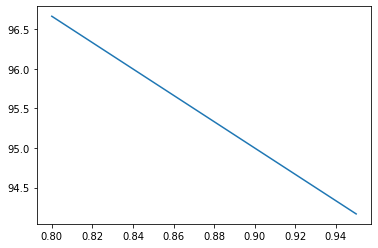

In [ ]:
a = [0.8, 0.85, 0.9, 0.95]
plt.plot(a, acc)
plt.show()